In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly.graph_objects as go
import requests as req
import json
from datetime import datetime
import datetime as datetimee
from dateutil.relativedelta import relativedelta
import warnings
import time as tm
warnings.filterwarnings("ignore")

### Request Data

In [18]:
# Make sure the Request_Date1 isn't a sunday!!
# Change the Total_Req amount depending on the need.
Req_per_minute = 5 #can request using the api up to 5 times per minute.
delay = 70 / Req_per_minute
Total_Req = 40
Symbol = 'QQQ'
Request_Date1 = '2023-07-05'
#Request_Date2 = '2021-08-02'
rowspull = 5000
df2 = pd.DataFrame()
for i in range(Total_Req):
    #check to avoid weekends
    year1, month1, day1 = Request_Date1.split('-')  
    year1 = int(year1); month1 = int(month1); day1 = int(day1);
    if datetimee.date(year1,month1,day1).strftime('%A') == 'Saturday':
        Request_Date1 = (datetimee.datetime.strptime(Request_Date1, '%Y-%m-%d') + datetimee.timedelta(days=2)).strftime('%Y-%m-%d')
        #Request_Date2 = (datetimee.datetime.strptime(Request_Date2, '%Y-%m-%d') + datetimee.timedelta(days=2)).strftime('%Y-%m-%d')
    Request_string = 'https://api.polygon.io/v2/aggs/ticker/'+Symbol+'/range/5/minute/'+Request_Date1+'/'+Request_Date1+'?adjusted=true&sort=asc&limit='+str(rowspull)+'&apiKey=5msoPvKD_Vl1it_uorssQeitM0MnHdYF'
    #Request data
    r = req.get(Request_string)
    res = json.loads(r.content)
    if res['queryCount'] == 0:  #avoid empty days
        Request_Date1 = (datetimee.datetime.strptime(Request_Date1, '%Y-%m-%d') + datetimee.timedelta(days=1)).strftime('%Y-%m-%d')
        #Request_Date2 = (datetime.datetimee.strptime(Request_Date2, '%Y-%m-%d') + datetimee.timedelta(days=1)).strftime('%Y-%m-%d')
        continue
    df = pd.DataFrame(res)
    #Clean and organize
    df1 = df[['ticker']].copy()
    df1['OpenPrice'] = df['results'].apply(lambda x: x.get('o'))
    df1['ClosePrice'] = df['results'].apply(lambda x: x.get('c'))
    df1['Highp'] = df['results'].apply(lambda x: x.get('h'))
    df1['Lowp'] = df['results'].apply(lambda x: x.get('l'))
    df1['Volume'] = df['results'].apply(lambda x: x.get('v'))
    df1['VWAP'] = df['results'].apply(lambda x: x.get('vw'))
    df1['Time'] = df.results.apply(lambda x: datetimee.datetime.fromtimestamp(int(x.get('t')) / 1000))
    df1['Date'] = pd.to_datetime(df1['Time']).dt.date
    df1['Time'] = pd.to_datetime(df1['Time']).dt.time
    df1['Date'] = pd.to_datetime(df1['Date'])
    #filter standard trading hours (israel time)
    df1['Time'] = pd.to_datetime(df1['Time'], format='%H:%M:%S')
    df1 = df1[(df1['Time'].dt.time > pd.to_datetime('16:25:00', format='%H:%M:%S').time()) & (df1['Time'].dt.time < pd.to_datetime('23:00:00', format='%H:%M:%S').time())]
    df1['Time'] = pd.to_datetime(df1['Time']).dt.time #return to time (object type)
    
    print(df1.Date.iloc[1]) #printing to see if/when loop gets stuck
    
    #concating the requests together to one big table (pre-made an empty df2)
    df2 = pd.concat([df1, df2])
    #update the date forward
    Request_Date1 = (datetimee.datetime.strptime(Request_Date1, '%Y-%m-%d') + datetimee.timedelta(days=1)).strftime('%Y-%m-%d')
    #Request_Date2 = (datetimee.datetime.strptime(Request_Date2, '%Y-%m-%d') + datetimee.timedelta(days=1)).strftime('%Y-%m-%d')
    #Delay 
    tm.sleep(delay)
    if i + 1 == Total_Req:
        break  
        
df2.to_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\QQQ10.csv', index=False)

2023-07-05 00:00:00
2023-07-06 00:00:00
2023-07-07 00:00:00
2023-07-10 00:00:00
2023-07-11 00:00:00
2023-07-12 00:00:00
2023-07-13 00:00:00
2023-07-14 00:00:00
2023-07-17 00:00:00
2023-07-18 00:00:00
2023-07-19 00:00:00
2023-07-20 00:00:00
2023-07-21 00:00:00
2023-07-24 00:00:00
2023-07-25 00:00:00
2023-07-26 00:00:00
2023-07-27 00:00:00
2023-07-28 00:00:00
2023-07-31 00:00:00
2023-08-01 00:00:00
2023-08-02 00:00:00
2023-08-03 00:00:00
2023-08-04 00:00:00
2023-08-07 00:00:00
2023-08-08 00:00:00
2023-08-09 00:00:00
2023-08-10 00:00:00
2023-08-11 00:00:00
2023-08-14 00:00:00


KeyError: 'queryCount'

### Concat, Save

In [20]:
## Saving a few requests, concating, removing duplicates and saving as 1 big csv file
dff1 = pd.read_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\QQQ5M2021_8-2023_6.csv')
dff2 = pd.read_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\QQQ10.csv')



dff10 = pd.concat([dff1, dff2])
dff10.drop_duplicates().dropna().sort_values(by=['Date','Time']).to_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\QQQ5M2021_8-2023_7.csv', index=False)

### View Chart by day

In [5]:
# Create the candlestick chart using plotly, Change Sample Data accordingly and specify Date/s
CandCharData = CurrentData #Sample Data
GraphDate = str(input('Date to show (YYYY-MM-DD):')).split(',')
CandCharData = CandCharData[CandCharData.Date.isin(GraphDate)]      #Filter for specified date
fig = go.Figure(data=[go.Candlestick(x=CandCharData['Time'],
                open=CandCharData['OpenPrice'],
                high=CandCharData['Highp'],
                low=CandCharData['Lowp'],
                close=CandCharData['ClosePrice'])])

fig.update_layout(
    title=str(CandCharData.ticker.unique())+', '+str(CandCharData.Date.unique()),
    xaxis_title='Time',
    yaxis_title='Price', 
    yaxis=dict(tickangle=0),
    xaxis_rangeslider_visible=False)

fig.show()

Date to show (YYYY-MM-DD):2023-07-05


### Stop/Profit relative to 1st candle:   (LONG - RED first candle)

In [3]:
CurrentData = pd.read_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\QQQ5M2022_6-12_2023_1-6.csv')
#optional date filtering:
#CurrentData = CurrentData[CurrentData.Date>'2022-06-01']
SizeRelativeVeriable = 1
WinLossRatio = 3
WinDates = [] ; LossDates = []
test2 = CurrentData[CurrentData['Date'].isin(CurrentData[(CurrentData.OpenPrice>CurrentData.ClosePrice) & (CurrentData.Time=='16:30:00')]['Date'])]
row_1630 = test2[test2['Time'] == '16:30:00']
daytestN = 0 ; EntryRow = 0
high_1630 = row_1630['Highp'].values[daytestN] ; low_1630 = row_1630['Lowp'].values[daytestN]
NoEntryCount = 0 ; EntriesCount = 0
LossCount = 0; WinCount = 0
for j in range (0, test2.Date.nunique()):
    high_1630 = row_1630['Highp'].values[daytestN]
    low_1630 = row_1630['Lowp'].values[daytestN]
    for i in range(row_1630.index[daytestN] + 1, row_1630.index[daytestN] + 1 + int(test2[test2.Date == test2.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):
        highp = test2.loc[i, 'Highp']
        lowp = test2.loc[i, 'Lowp']
        if lowp < (low_1630):
            NoEntryCount += 1
            break 
        elif highp > (high_1630):
            EntriesCount += 1
            EntryRow = i
            for k in range(EntryRow, row_1630.index[daytestN] + 1 + int(test2[test2.Date == test2.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):  #range from 2nd row till end of day
                highp = test2.loc[k, 'Highp']
                lowp = test2.loc[k, 'Lowp']
                GapToLoss = (high_1630-low_1630) * SizeRelativeVeriable
                GapToProfit = GapToLoss*WinLossRatio
                if lowp <= (high_1630 - GapToLoss):
                    LossCount += 1
                    LossDates.append(row_1630.iloc[daytestN]['Date'])
                    break
                elif highp >= (high_1630 + GapToProfit):
                    WinCount += 1
                    WinDates.append(row_1630.iloc[daytestN]['Date'])
                    break
                else:
                    continue
            break
        else:
            continue
    daytestN += 1
print ("Dates tested:", CurrentData[0:1].Date.values[0], "-", CurrentData[-1:].Date.values[0])
print ("No entry count =", str(NoEntryCount)) ; print ("Entries count =", str(EntriesCount))
print ("Loss count =", str(LossCount)) ;  print ("Win count =", str(WinCount))
print ("trades that didn't close =", str(EntriesCount-LossCount-WinCount))
print ("Profit:",str(round(WinCount*(GapToProfit/GapToLoss)-LossCount,2))+"R")

Dates tested: 2022-06-01 - 2023-07-05
No entry count = 106
Entries count = 28
Loss count = 11
Win count = 12
trades that didn't close = 5
Profit: 25.0R


### test ratios (Loss/Profit related to candle)

In [ ]:
CurrentData = pd.read_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\GOOG2021_8-2023_7.csv')
##### how high price goes up before goes below low of 1st candle:
# Also saving results for a future table.
TestResults = {'LowP_1630':[], 'HighP_1630': [],'peak_price': [], 'Gap_to_peak': [], 'touch_stop': [],'Date': [], 'StartDate': [], 'EndDate': []} #empty results dictionary to create dataframe later
test1 = CurrentData[CurrentData['Date'].isin(CurrentData[CurrentData.Time=='16:30:00']['Date'])]  #(filtered days)69 days of positive first candle
#creating a loop that use the indexes to check if price went up or broke below stop
row_1630 = test1[test1['Time'] == '16:30:00']
#RatioMultiplier = 1 #starting at 1:1 ratio
#RatioLimit = 4
#GapToLoss = 0.5 #starting at 0.5, raising by 1/6 each time (gives both thirds and halves)
#GapToProfit = GapToLoss*RatioMultiplier
#GapToProfitLimit = 4.5
daytestN = 0
EntryRow = 0
high_1630 = row_1630['Highp'].values[daytestN]
low_1630 = row_1630['Lowp'].values[daytestN]
#NoEntryCount = 0 
#EntriesCount = 0
#LossCount = 0
#WinCount = 0
#while RatioMultiplier <= RatioLimit:  #Loop to test different ratios
#    GapToLoss = 0.5
#    GapToProfit = GapToLoss*RatioMultiplier
#    while GapToProfit < GapToProfitLimit:  #Loop for testing gaps
#        GapToProfit = GapToLoss*RatioMultiplier
daytestN = 0
EntryRow = 0
high_1630 = row_1630['Highp'].values[daytestN]
low_1630 = row_1630['Lowp'].values[daytestN]
NoEntryCount = 0 
EntriesCount = 0
LossCount = 0
WinCount = 0
for j in range (0, test1.Date.nunique()):  #Loop to to set variables for each day
    high_1630 = row_1630['Highp'].values[daytestN]
    low_1630 = row_1630['Lowp'].values[daytestN]
    for i in range(row_1630.index[daytestN] + 1, row_1630.index[daytestN] + 1 + int(test1[test1.Date == test1.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):  #Loop to check entries
        highp = test1.loc[i, 'Highp']
        lowp = test1.loc[i, 'Lowp']
        if lowp < (low_1630):
            NoEntryCount += 1
            break 
        elif highp > (high_1630):
            EntriesCount += 1
            EntryRow = i
            for k in range(EntryRow, row_1630.index[daytestN] + 1 + int(test1[test1.Date == test1.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):  #range from 2nd row till end of day  #Loop to check results              
                if test1.loc[k, 'Highp'] > highp:
                    highp = test1.loc[k, 'Highp']                
                lowp = test1.loc[k, 'Lowp']
                if lowp <= (low_1630):
                    TestResults['LowP_1630'].append(low_1630)
                    TestResults['HighP_1630'].append(high_1630)
                    TestResults['peak_price'].append(highp)
                    TestResults['Gap_to_peak'].append(highp-high_1630)
                    TestResults['touch_stop'].append('Yes')
                    TestResults['Date'].append(test1.loc[k].Date)
                    TestResults['StartDate'].append(CurrentData[0:1].Date.values[0])
                    TestResults['EndDate'].append(CurrentData[-1:].Date.values[0])
                    break
                elif test1.loc[k].Time == '22:55:00':
                    TestResults['LowP_1630'].append(low_1630)
                    TestResults['HighP_1630'].append(high_1630)
                    TestResults['peak_price'].append(highp)
                    TestResults['Gap_to_peak'].append(highp-high_1630)
                    TestResults['touch_stop'].append('No')
                    TestResults['Date'].append(test1.loc[k].Date)
                    TestResults['StartDate'].append(CurrentData[0:1].Date.values[0])
                    TestResults['EndDate'].append(CurrentData[-1:].Date.values[0])
                    break
                else:
                    continue
            break
        else:
            continue
    daytestN += 1
results = pd.DataFrame(TestResults)
results['FstCandSize'] = (results.HighP_1630-results.LowP_1630)
results['Ratio'] = (results.peak_price-results.HighP_1630)/(results.HighP_1630-results.LowP_1630)
print ('No entries:', str(NoEntryCount))
print ('Entries:', str(EntriesCount))
results

### Test ratios (fixed Loss/Profit gaps)

In [ ]:
CurrentData = pd.read_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\AAPL2021_8-2023_7.csv')

TestRes = {'R_Profit': [],'Ratio': [], 'Gaps': [], 'Entries': [], 'wins': [], 'Losses': [], 'OpenTrades': [], 'StartDate': [], 'EndDate': []} #empty results dictionary to create dataframe later
test1 = CurrentData[CurrentData['Date'].isin(CurrentData[(CurrentData.OpenPrice<CurrentData.ClosePrice) & (CurrentData.Time=='16:30:00')]['Date'])]  #(filtered days)69 days of positive first candle
#creating a loop that use the indexes to check if price went up or broke below stop
row_1630 = test1[test1['Time'] == '16:30:00']
RatioMultiplier = 1 #starting at 1:1 ratio
RatioLimit = 4
GapToLoss = 0.5 #starting at 0.5, raising by 1/6 each time (gives both thirds and halves)
GapToProfit = GapToLoss*RatioMultiplier
GapToProfitLimit = 4
daytestN = 0
EntryRow = 0
high_1630 = row_1630['Highp'].values[daytestN]
low_1630 = row_1630['Lowp'].values[daytestN]
NoEntryCount = 0 
EntriesCount = 0
LossCount = 0
WinCount = 0
while RatioMultiplier <= RatioLimit:  #Loop to test different ratios
    GapToLoss = 0.5
    GapToProfit = GapToLoss*RatioMultiplier
    while GapToProfit < GapToProfitLimit:  #Loop for testing gaps
        GapToProfit = GapToLoss*RatioMultiplier
        daytestN = 0
        EntryRow = 0
        high_1630 = row_1630['Highp'].values[daytestN]
        low_1630 = row_1630['Lowp'].values[daytestN]
        NoEntryCount = 0 
        EntriesCount = 0
        LossCount = 0
        WinCount = 0
        for j in range (0, test1.Date.nunique()):  #Loop to to set variables for each day
            high_1630 = row_1630['Highp'].values[daytestN]
            low_1630 = row_1630['Lowp'].values[daytestN]
            for i in range(row_1630.index[daytestN] + 1, row_1630.index[daytestN] + 1 + int(test1[test1.Date == test1.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):  #Loop to check entries
                highp = test1.loc[i, 'Highp']
                lowp = test1.loc[i, 'Lowp']
                if lowp < (low_1630):
                    NoEntryCount += 1
                    break 
                elif highp > (high_1630):
                    EntriesCount += 1
                    EntryRow = i
                    for k in range(EntryRow, row_1630.index[daytestN] + 1 + int(test1[test1.Date == test1.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):  #range from 2nd row till end of day  #Loop to check results
                        highp = test1.loc[k, 'Highp']
                        lowp = test1.loc[k, 'Lowp']
                        if lowp <= (high_1630 - GapToLoss):
                            LossCount += 1
                            break
                        elif highp >= (high_1630 + GapToProfit):
                            WinCount += 1
                            break
                        else:
                            continue
                    break
                else:
                    continue
            daytestN += 1
        # Recording loop results:
        TestRes['R_Profit'].append(round(WinCount*(GapToProfit/GapToLoss)-LossCount,2))
        TestRes['Ratio'].append('1:'+str(RatioMultiplier))
        TestRes['Gaps'].append(str(round(GapToLoss,2))+', '+str(round(GapToProfit,2)))
        TestRes['Entries'].append(EntriesCount)
        TestRes['wins'].append(WinCount)
        TestRes['Losses'].append(LossCount)
        TestRes['OpenTrades'].append(EntriesCount-LossCount-WinCount)
        TestRes['StartDate'].append(CurrentData[0:1].Date.values[0])
        TestRes['EndDate'].append(CurrentData[-1:].Date.values[0])
        GapToLoss += (1/6) #update loop forward
    RatioMultiplier += 0.25
resultss = pd.DataFrame(TestRes)
resultss.sort_values('R_Profit', ascending=False)

### Stop/Profit fixed price with PChange and table for performance over time (plot chart):

Dates tested: 2021-08-16 - 2023-07-05
No entry count = 27
Entries count = 64
Loss count = 43
Win count = 21
trades that didn't close = 0
Profit: 32.6R


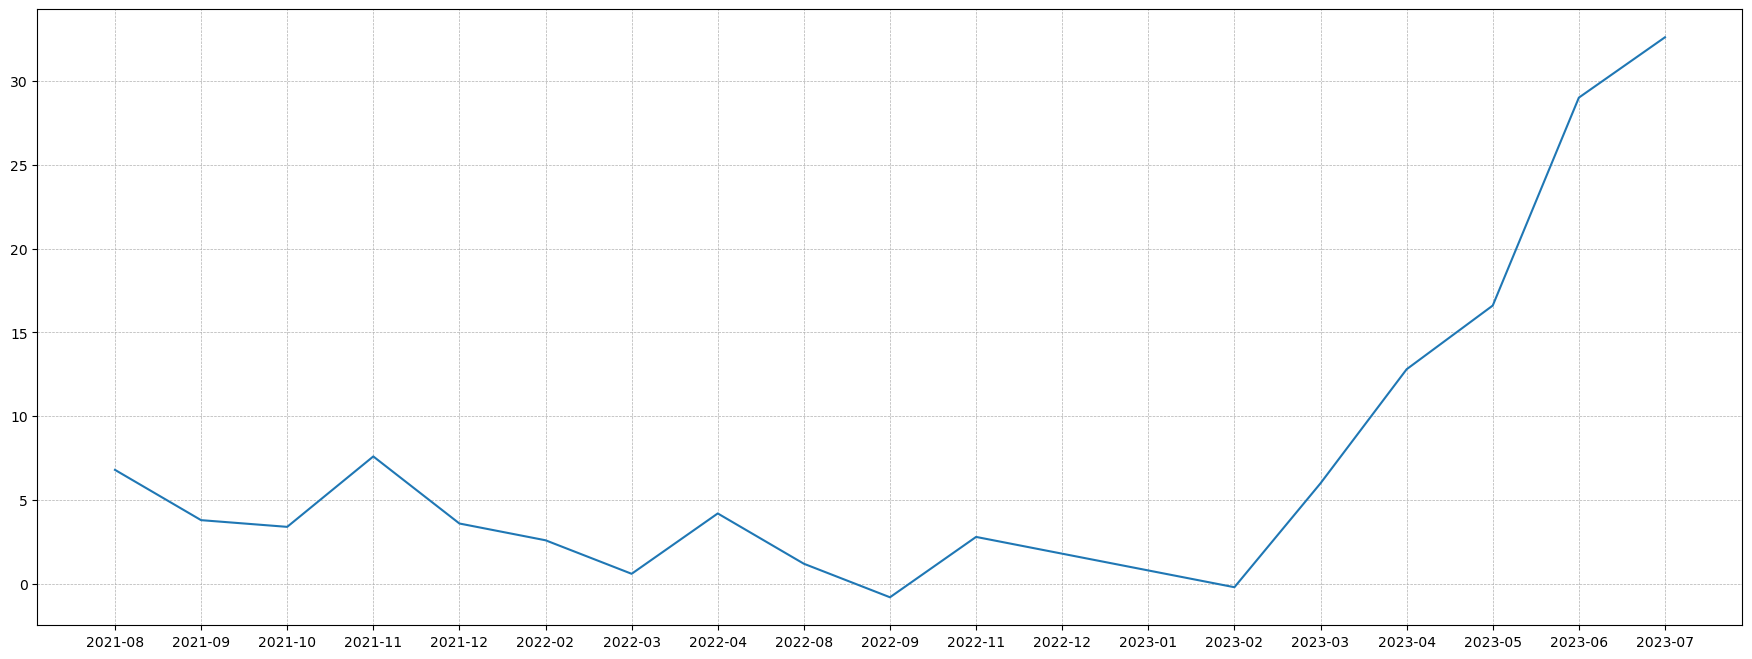

,Date,Outcome,R_Result,Cumulative_R_Result,YYMM
0,2021-08-16,Loss,-1.0,-1.0,2021-08
1,2021-08-18,Loss,-1.0,-2.0,2021-08
2,2021-08-20,Win,3.6,1.6,2021-08
3,2021-08-23,Win,3.6,5.2,2021-08
4,2021-08-25,Loss,-1.0,4.2,2021-08


In [17]:
CurrentData = pd.read_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\QQQ5M2021_8-2023_6.csv')
WFChart = {'Date':[], 'Outcome': [],'R_Result': []} #empty results dictionary to create dataframe later for performance graph
# Add YYMM Column to filter months:
CurrentData['YYMM'] = CurrentData.Date.str[:-3]
TestMonths = ['2021-09','2021-10','2022-04','2022-05','2022-09','2022-10','2023-04','2023-05']
#CurrentData = CurrentData[CurrentData.YYMM.isin(TestMonths)]
#Adding Daily Gaps:
gapadd = CurrentData.groupby('Date').Time.max().to_frame().reset_index().merge(CurrentData.groupby('Date').Time.min().to_frame().reset_index(), on='Date')
gapadd.rename(columns={'Time_x': 'CloseTime', 'Time_y': 'OpenTime'}, inplace=True)
gapadd = CurrentData.merge(gapadd, on = 'Date')
gapadd = CurrentData[(gapadd.Time==gapadd.CloseTime) | (gapadd.Time==gapadd.OpenTime)].sort_values(['Date','Time'])
gapadd['DayGap'] = None
for i in range(gapadd.shape[0]):
    if i==0:
        gapadd['DayGap'].iloc[i] = 0
    elif i//2==i/2:
        gapadd['DayGap'].iloc[i] = round((gapadd.OpenPrice.iloc[i]-gapadd.ClosePrice.iloc[i-1])/gapadd.ClosePrice.iloc[i-1]*100, 2)
    else:
        gapadd['DayGap'].iloc[i] = gapadd['DayGap'].iloc[i-1]
CurrentData = CurrentData.merge(gapadd[gapadd.Time=='16:30:00'][['Date','DayGap']], on='Date') 
CurrentData.DayGap = CurrentData.DayGap.astype(float)

#optional date filtering:
#CurrentData = CurrentData[CurrentData.Date>'2023-01-01']
#Adding PChange column (for first candle price range)
CurrentData['C1Range'] = CurrentData.Highp - CurrentData.Lowp  #price range of candle $
CurrentData['PChange'] = CurrentData['C1Range']/CurrentData['OpenPrice']*100 #create PChange to filter for first candles

PChange = 0.35
test2 = CurrentData[CurrentData['Date'].isin(CurrentData[(CurrentData.OpenPrice<CurrentData.ClosePrice) & (CurrentData.Time=='16:30:00')]['Date'])]
test2 = test2[test2.Date.isin(test2[(test2['Time']=='16:30:00')&(test2['PChange']<=PChange)].Date)&(test2['DayGap']<1)&(test2['DayGap']>-1)]    # Filter dates with PChange <=0.35 and DayGap<1%
#test2 = test2[test2.Date.isin(test2[(test2['Time']=='16:30:00')&(test2['PChange']<=PChange)].Date)]    # Filter dates with PChange <=0.35

#collecting winning and loosing dates:
WinDates = []
LossDates = []
#creating a loop that use the indexes to check if price went up or broke below stop
row_1630 = test2[test2['Time'] == '16:30:00'] #Filtered for first candle (and PChange =<0.35 earlier)
GapToLoss = 0.5 
GapToProfit = 1.8
daytestN = 0
EntryRow = 0
high_1630 = row_1630['Highp'].values[daytestN]
low_1630 = row_1630['Lowp'].values[daytestN]
NoEntryCount = 0 
EntriesCount = 0
LossCount = 0
WinCount = 0
for j in range (0, test2.Date.nunique()):
    high_1630 = row_1630['Highp'].values[daytestN]
    low_1630 = row_1630['Lowp'].values[daytestN]
    for i in range(row_1630.index[daytestN] + 1, row_1630.index[daytestN] + 1 + int(test2[test2.Date == test2.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):
        highp = test2.loc[i, 'Highp']
        lowp = test2.loc[i, 'Lowp']
        if lowp < (low_1630):
            NoEntryCount += 1
            WFChart['Date'].append(test2.loc[i, 'Date'])
            WFChart['Outcome'].append('No Entry')
            WFChart['R_Result'].append(0)
            break 
        elif highp > (high_1630):
            EntriesCount += 1
            EntryRow = i
            for k in range(EntryRow, row_1630.index[daytestN] + 1 + int(test2[test2.Date == test2.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):  #range from 2nd row till end of day
                highp = test2.loc[k, 'Highp']
                lowp = test2.loc[k, 'Lowp']
                if lowp <= (high_1630 - GapToLoss):
                    LossCount += 1
                    LossDates.append(row_1630.iloc[daytestN]['Date'])
                    WFChart['Date'].append(test2.loc[i, 'Date'])
                    WFChart['Outcome'].append('Loss')
                    WFChart['R_Result'].append(-1)
                    break
                elif highp >= (high_1630 + GapToProfit):
                    WinCount += 1
                    WinDates.append(row_1630.iloc[daytestN]['Date'])
                    WFChart['Date'].append(test2.loc[i, 'Date'])
                    WFChart['Outcome'].append('Win')
                    WFChart['R_Result'].append(GapToProfit/GapToLoss)
                    break
                else:
                    continue
            break
        else:
            continue
    daytestN += 1

print ("Dates tested:", CurrentData[0:1].Date.values[0], "-", CurrentData[-1:].Date.values[0])
print ("No entry count =", str(NoEntryCount)) ; print ("Entries count =", str(EntriesCount))
print ("Loss count =", str(LossCount)) ;  print ("Win count =", str(WinCount))
print ("trades that didn't close =", str(EntriesCount-LossCount-WinCount))
print ("Profit:",str(round(WinCount*(GapToProfit/GapToLoss)-LossCount,2))+"R")
WFChart = pd.DataFrame(WFChart)
WFChart.sort_values(by='Date', inplace=True)
WFChart['Cumulative_R_Result'] = WFChart['R_Result'].cumsum()
WFChart['YYMM'] = WFChart.Date.str[:-3]
WFChartMonthly = WFChart.groupby('YYMM').sum('R_Result').R_Result.to_frame()
WFChartMonthly.reset_index(inplace=True)
WFChartMonthly['MonthlyCumSum'] = WFChartMonthly.R_Result.cumsum()
plt.figure(figsize=(22, 8))
plt.plot(WFChartMonthly['YYMM'], WFChartMonthly['MonthlyCumSum'])
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()
WFChart.head()

### Add daily gaps

In [51]:
gapadd = CurrentData.groupby('Date').Time.max().to_frame().reset_index().merge(CurrentData.groupby('Date').Time.min().to_frame().reset_index(), on='Date')
gapadd.rename(columns={'Time_x': 'CloseTime', 'Time_y': 'OpenTime'}, inplace=True)
gapadd = CurrentData.merge(gapadd, on = 'Date')
gapadd = CurrentData[(gapadd.Time==gapadd.CloseTime) | (gapadd.Time==gapadd.OpenTime)].sort_values(['Date','Time'])

gapadd['DayGap'] = None
for i in range(gapadd.shape[0]):
    if i==0:
        gapadd['DayGap'].iloc[i] = 0
    elif i//2==i/2:
        gapadd['DayGap'].iloc[i] = round((gapadd.OpenPrice.iloc[i]-gapadd.ClosePrice.iloc[i-1])/gapadd.ClosePrice.iloc[i-1]*100, 2)
    else:
        gapadd['DayGap'].iloc[i] = gapadd['DayGap'].iloc[i-1]

CurrentData = CurrentData.merge(gapadd[gapadd.Time=='16:30:00'][['Date','DayGap']], on='Date') 
CurrentData.DayGap = CurrentData.DayGap.astype(float)
CurrentData

AttributeError: 'DataFrame' object has no attribute 'DayGap'

#### Win, Loss Dates - Day Gap stats

In [4]:
print('Win dates day gap stats:')
print(CurrentData[CurrentData.Date.isin(WinDates)].DayGap.describe())
print('Loss dates day gap stats:')
print(CurrentData[CurrentData.Date.isin(LossDates)].DayGap.describe())

Win dates day gap stats:
count    1092.000000
mean       -0.087143
std         0.498101
min        -0.960000
25%        -0.440000
50%        -0.065000
75%         0.420000
max         0.710000
Name: DayGap, dtype: float64
Loss dates day gap stats:
count    1716.000000
mean       -0.272273
std         0.410274
min        -0.970000
25%        -0.660000
50%        -0.105000
75%         0.040000
max         0.480000
Name: DayGap, dtype: float64


### Add Daily Range

In [5]:
dayrang = CurrentData.groupby('Date').Highp.max().to_frame().reset_index().merge(CurrentData.groupby('Date').Lowp.min().to_frame().reset_index(), on='Date')
dayrang.rename(columns={'Highp_x': 'DayHigh', 'Lowp_x': 'DayLow'}, inplace=True)
dayrang['DayRange'] = dayrang['Highp']-dayrang['Lowp']
CurrentData = CurrentData.merge(dayrang[['Date','DayRange']], on='Date') 
CurrentData.DayGap = CurrentData.DayGap.astype(float)
CurrentData.head(3)

,ticker,OpenPrice,ClosePrice,Highp,Lowp,Volume,VWAP,Time,Date,DayGap,C1Range,PChange,DayRange
0,QQQ,310.47,311.83,312.06,310.43,2022941.0,311.3465,16:30:00,2022-06-01,0.0,1.63,0.525010,8.92
1,QQQ,311.82,311.29,312.43,311.22,1643581.0,311.9439,16:35:00,2022-06-01,0.0,1.21,0.388044,8.92
2,QQQ,311.29,311.56,311.83,310.97,1209913.0,311.4239,16:40:00,2022-06-01,0.0,0.86,0.276270,8.92


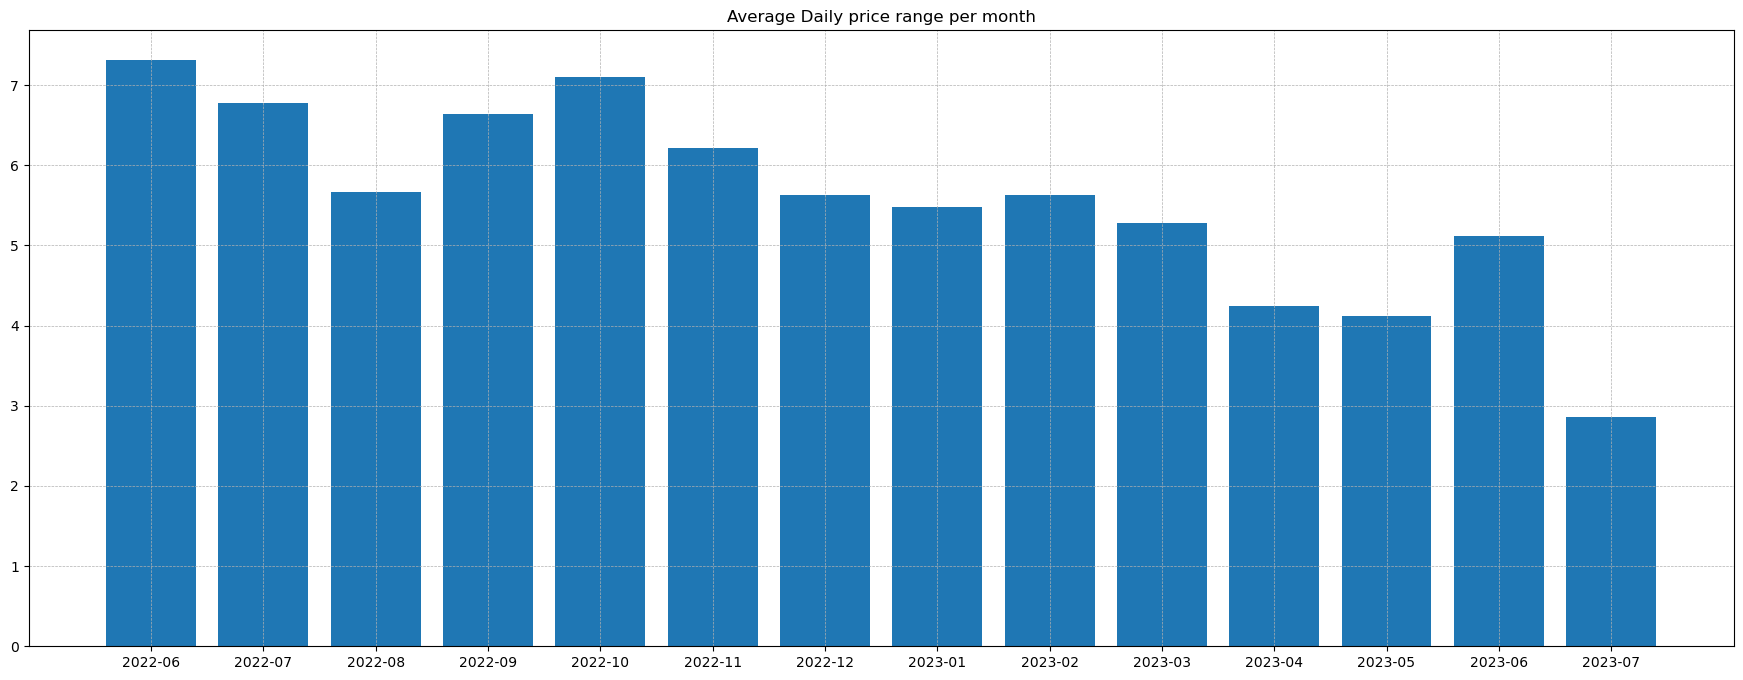

In [6]:
#Daily Range Average per Month
CurrentData['YYMM'] = CurrentData.Date.str[:-3]
plt.figure(figsize=(22, 8))
plt.bar(CurrentData.groupby('YYMM').YYMM.max(),CurrentData.groupby('YYMM').DayRange.mean())
plt.grid(True, linestyle='--', linewidth=0.5)
plt.title("Average Daily price range per month")
plt.show()

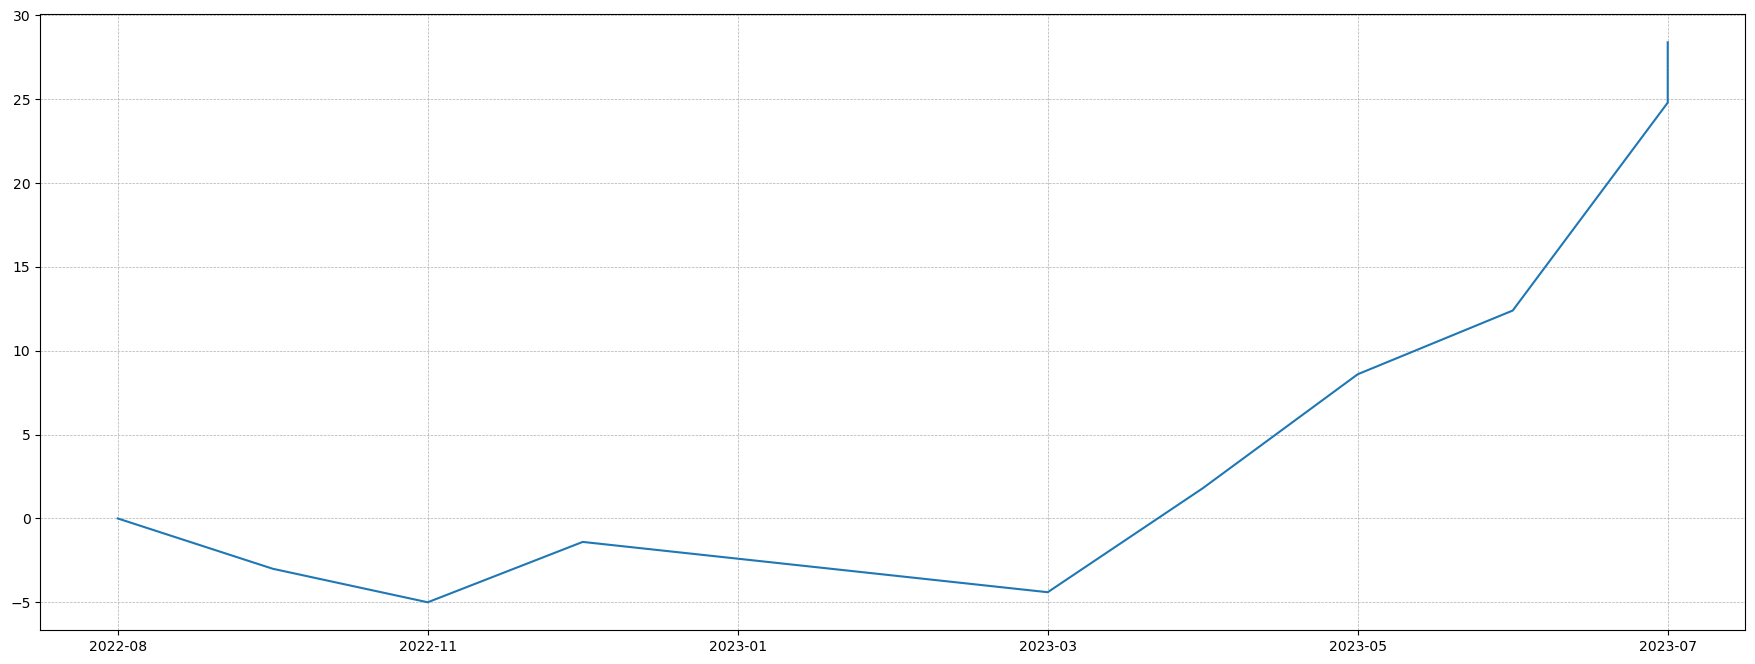

In [7]:
# Showing strategy results over time, ForGraphX is custom and must be updated to 1 future month 
ForGraphX = ['2023-07']
ForGraphX = list(WFChartMonthly['YYMM']) + ForGraphX
ForGraphX
ForGraphY = [0]
ForGraphY = ForGraphY + list(WFChartMonthly.MonthlyCumSum)
plt.figure(figsize=(22, 8))
plt.plot(ForGraphX, ForGraphY)
#Making X ticks per 2 months to reduce clutter
custom_ticks = ForGraphX[::2]
custom_labels = ForGraphX[::2]
plt.xticks(custom_ticks, custom_labels)

plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

### Add Stoch-RSI

In [ ]:
# Define input values (CurrentData)
smoothK = 3
lengthRSI = 6
lengthStoch = 11
# Calculate RSI and Stochastic RSI
CurrentData['RSI'] = ta.momentum.RSIIndicator(CurrentData['ClosePrice'], lengthRSI).rsi()
rsi1 = CurrentData['RSI']
CurrentData['StochRSI'] = ta.momentum.StochasticOscillator(CurrentData['RSI'], CurrentData['RSI'], CurrentData['RSI'], window=lengthStoch, smooth_window=smoothK).stoch()
# Calculate the smoothed K value
CurrentData['StochRSI'+str(lengthRSI)+'_'+str(lengthStoch)] = CurrentData['StochRSI'].rolling(window=smoothK).mean()
CurrentData.drop(columns=['RSI','StochRSI'], inplace=True) #drop extra columns
CurrentData[CurrentData.Date=='2023-08-14'].head()

In [11]:
### Create a loop to run each month seperatley then concat results to see connection between best gaps/ratios and 
### Monthly daily range/volume from other tables

#CurrentData = pd.read_csv('D:\\Users\\amit\\Desktop\\מסחר\\Python\\SPY5M2021_8-2023_6.csv') ##noted due to previous runs##
MonthlyTopTable = pd.DataFrame()
StartDate = '2022-06-01'
for i in range (12): ### range affects number of months to test
    EndDate = (datetime.strptime(StartDate, '%Y-%m-%d') + relativedelta(months=1)).strftime('%Y-%m-%d') #Add 1 month to StartDate
    #filter dates:
    CurrentData1 = CurrentData[(CurrentData.Date >= StartDate) & (CurrentData.Date < EndDate)]

    TestRes = {'R_Profit': [],'Ratio': [], 'Gaps': [], 'Entries': [], 'wins': [], 'Losses': [], 'OpenTrades': [], 'YYMM': []} #empty results dictionary to create dataframe later
    test1 = CurrentData1[CurrentData1['Date'].isin(CurrentData1[(CurrentData1.OpenPrice<CurrentData1.ClosePrice) & (CurrentData1.Time=='16:30:00')]['Date'])]  #(filtered days) days of positive first candle
    #creating a loop that use the indexes to check if price went up or broke below stop
    row_1630 = test1[test1['Time'] == '16:30:00']
    RatioMultiplier = 1 #starting at 1:1 ratio
    RatioLimit = 8
    GapToLoss = 0.4 #starting at 0.5, raising by 1/6 each time (gives both thirds and halves)
    GapToProfit = GapToLoss*RatioMultiplier
    GapToProfitLimit = 7
    daytestN = 0 ; EntryRow = 0 ; NoEntryCount = 0 ; EntriesCount = 0 ; LossCount = 0 ; WinCount = 0
    high_1630 = row_1630['Highp'].values[daytestN]
    low_1630 = row_1630['Lowp'].values[daytestN]

    while RatioMultiplier <= RatioLimit:  #Loop to test different ratios
        GapToLoss = 0.5
        GapToProfit = GapToLoss*RatioMultiplier
        while GapToProfit < GapToProfitLimit:  #Loop for testing gaps
            GapToProfit = GapToLoss*RatioMultiplier
            daytestN = 0
            EntryRow = 0
            high_1630 = row_1630['Highp'].values[daytestN]
            low_1630 = row_1630['Lowp'].values[daytestN]
            NoEntryCount = 0 
            EntriesCount = 0
            LossCount = 0
            WinCount = 0
            for j in range (0, test1.Date.nunique()):  #Loop to to set variables for each day
                high_1630 = row_1630['Highp'].values[daytestN]
                low_1630 = row_1630['Lowp'].values[daytestN]
                for i in range(row_1630.index[daytestN] + 1, row_1630.index[daytestN] + 1 + int(test1[test1.Date == test1.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):  #Loop to check entries
                    highp = test1.loc[i, 'Highp']
                    lowp = test1.loc[i, 'Lowp']
                    if lowp < (low_1630):
                        NoEntryCount += 1
                        break 
                    elif highp > (high_1630):
                        EntriesCount += 1
                        EntryRow = i
                        for k in range(EntryRow, row_1630.index[daytestN] + 1 + int(test1[test1.Date == test1.loc[row_1630.index[daytestN]].Date][['Time']].count()-1)):  #range from 2nd row till end of day  #Loop to check results
                            highp = test1.loc[k, 'Highp']
                            lowp = test1.loc[k, 'Lowp']
                            if lowp <= (high_1630 - GapToLoss):
                                LossCount += 1
                                break
                            elif highp >= (high_1630 + GapToProfit):
                                WinCount += 1
                                break
                            else:
                                continue
                        break
                    else:
                        continue
                daytestN += 1
            # Recording loop results:
            TestRes['R_Profit'].append(round(WinCount*(GapToProfit/GapToLoss)-LossCount,2))
            TestRes['Ratio'].append('1:'+str(RatioMultiplier))
            TestRes['Gaps'].append(str(round(GapToLoss,2))+', '+str(round(GapToProfit,2)))
            TestRes['Entries'].append(EntriesCount)
            TestRes['wins'].append(WinCount)
            TestRes['Losses'].append(LossCount)
            TestRes['OpenTrades'].append(EntriesCount-LossCount-WinCount)
            TestRes['YYMM'].append(row_1630.Date.str[:-3].max())
            GapToLoss += (1/6) #update loop forward
        RatioMultiplier += 0.25
    resultss = pd.DataFrame(TestRes)
    MonthlyTopTable = pd.concat([resultss[resultss.R_Profit==resultss.R_Profit.max()].head(1), MonthlyTopTable]) #concating best results each month
    StartDate = (datetime.strptime(StartDate, '%Y-%m-%d') + relativedelta(months=1)).strftime('%Y-%m-%d') #Progress loop forward
MonthlyTopTable

,R_Profit,Ratio,Gaps,Entries,wins,Losses,OpenTrades,YYMM
324,8.50,1:7.75,"0.67, 5.17",11,2,7,2,2023-05
249,9.50,1:4.5,"0.5, 2.25",7,3,4,0,2023-04
289,8.00,1:6.0,"0.5, 3.0",6,2,4,0,2023-03
61,1.25,1:1.25,"4.0, 5.0",7,1,0,6,2023-02
128,4.00,1:2.0,"1.5, 3.0",6,3,2,1,2023-01
143,2.75,1:2.25,"0.67, 1.5",7,3,4,0,2022-12
233,6.00,1:4.0,"0.67, 2.67",4,2,2,0,2022-11
227,8.25,1:3.75,"1.33, 5.0",8,3,3,2,2022-10
160,7.00,1:2.5,"0.67, 1.67",7,4,3,0,2022-09
57,0.50,1:1.25,"3.33, 4.17",10,2,2,6,2022-08


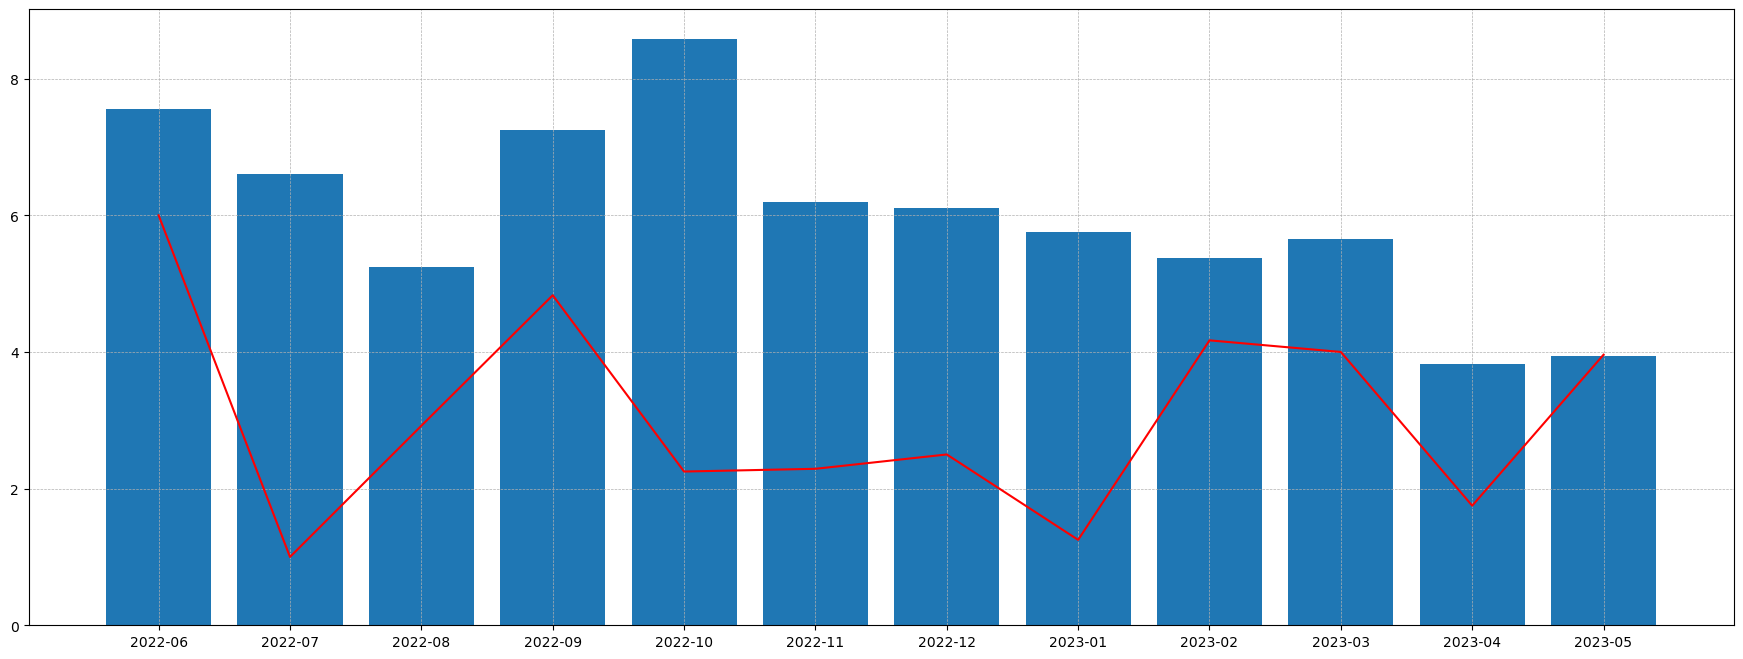

In [91]:
# (Best Gap to profit) over (Daily Range Average per Month)
CurrentData2 = CurrentData[(CurrentData.Date >= '2022-06-01') & (CurrentData.Date < '2023-06-01')]
CurrentData2['YYMM'] = CurrentData2.Date.str[:-3]
GapstoTop = [float(value.replace("'", "").replace(" ", "")) for values in list(MonthlyTopTable['Gaps']) for value in values.split(",")][1::2]
plt.figure(figsize=(22, 8))
plt.bar(CurrentData2.groupby('YYMM').YYMM.max(),CurrentData2.groupby('YYMM').DayRange.mean())
plt.plot(MonthlyTopTable.YYMM, GapstoTop, color='red')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

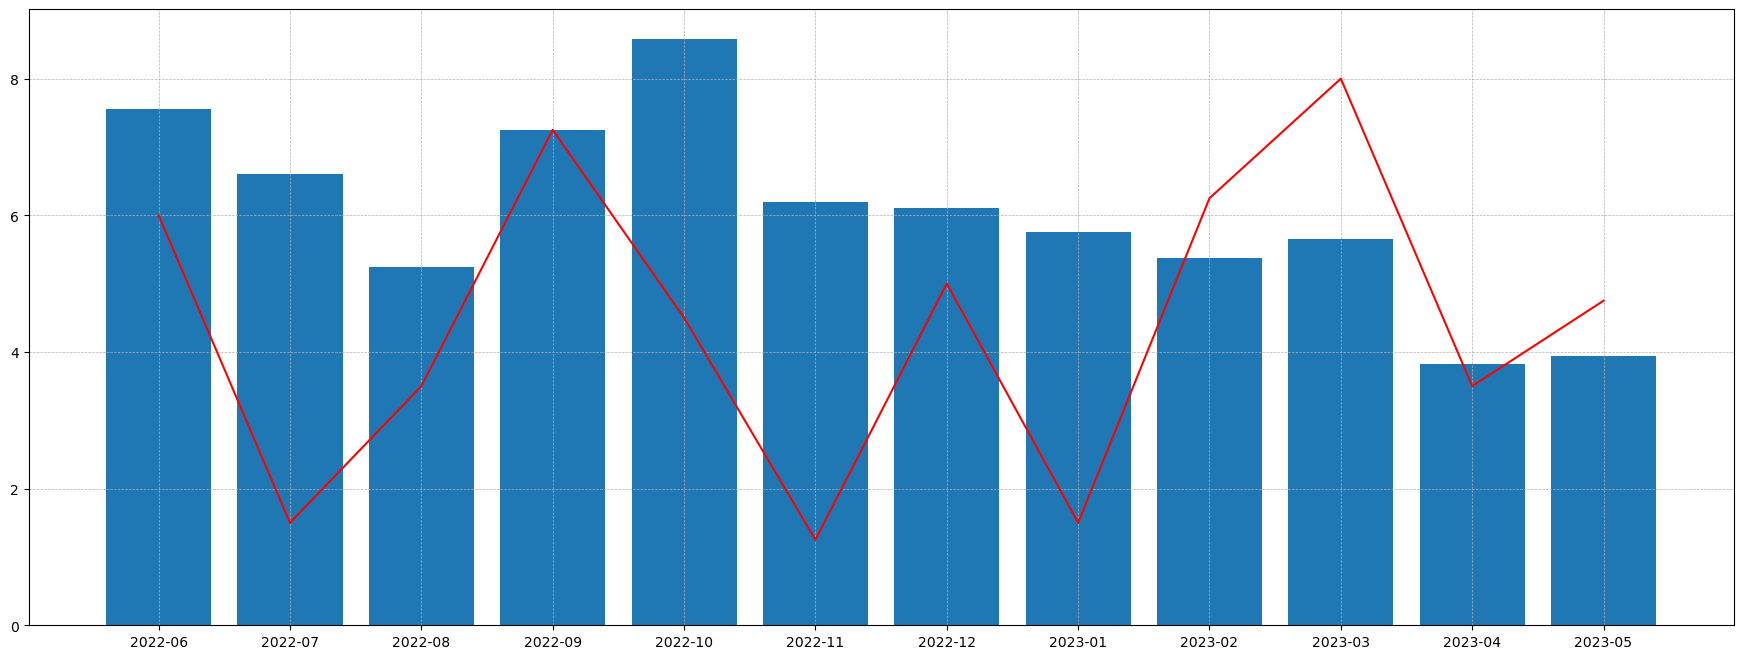

In [100]:
# (Best Gap to profit) over (Daily Range Average per Month)
CurrentData2 = CurrentData[(CurrentData.Date >= '2022-06-01') & (CurrentData.Date < '2023-06-01')]
CurrentData2['YYMM'] = CurrentData2.Date.str[:-3]
ratiooo = [float(value.replace("'", "").replace(" ", "").replace("1:", "")) for values in list(MonthlyTopTable['Ratio']) for value in values.split(",")]
plt.figure(figsize=(22, 8))
plt.bar(CurrentData2.groupby('YYMM').YYMM.max(),CurrentData2.groupby('YYMM').DayRange.mean())
plt.plot(MonthlyTopTable.YYMM, ratiooo, color='red')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()